<a href="https://colab.research.google.com/github/TALeonard/19ma573thomasleonard/blob/master/src/hw2_second_fd_v01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework assignment 2, part 1 (Second FD)

# Problem 

Let $f(x) = \sin x$. Plot $f''$ and $\delta_{-h} \delta_h f$ with $h = .5$

# Anal


One of the commonly used FD for $f''$ is the following:
$$f''(x) = \frac{d}{dx} f'(x) \simeq \delta_h f'(x) \simeq \delta_h \delta_{-h} f(x).$$
If we write it explicitly, then
$$f''(x) \simeq \frac{f(x+h) - 2 f(x) + f(x-h)}{h^2}.$$

__Prop__

The central finite difference for the second order has convergence order $1$.

__Proof__ 

First, recall the Taylor series expansion for $f(x_{0}+h)$: 

$$f(x_{0}+h) = f(x_{0})+f'(x_{0})h+\frac{f''(x_{0})h^{2}}{2}+\frac{f'''(x_{0})h^{3}}{3!}+...+\frac{f^{n}(x_{0})h^{n}}{n!}+R_{n}(x)$$

For this, we will opt to truncate at the third degree, denoting the remainder after the $f''(x_{0})$ term as $O(h^{4})$.

Next, note that we can expand the Taylor series for $f(x_{0}-h)$ similarly:

$$f(x_{0}-h) = f(x_{0})+f'(x_{0})(-h)+\frac{f''(x_{0})h^{2}}{2}+\frac{f'''(x_{0})(-h^{3})}{3!}+O(h^{4})$$

Given what our end result will be, now let us consider $f(x+h) + f(x-h)$:

$$f(x+h) + f(x-h) = f(x) + f'(x)h + \frac{f''(x)h^{2}}{2} +\frac{f'''(x)(h^{3})}{3!}+f(x)+f'(x)(-h)+\frac{f''(x)h^{2}}{2}+\frac{f'''(x)(-h^{3})}{3!}O(h^{4})$$

Start combining like terms and simplify down. Note that the $f'(x)$ and $f'''(x)$ terms both cancel out here:
$$f(x+h) + f(x-h) = 2f(x) + f'(x)h - f'(x)h+\frac{2f''(x)h^{2}}{2}+\frac{f'''(x)(h^{3})}{3!}-\frac{f'''(x)(h^{3})}{3!}+O(h^{4})$$

$$f(x+h) + f(x-h) = 2f(x) + f''(x)h^{2}+O(h^{4})$$


Move the f(x) term to the left-hand side:
$$f(x+h) + f(x-h) - 2f(x) = f''(x)h^{2}+O(h^{4})$$

Now, divide by $h^{2}$:
$$\frac{f(x+h) + f(x-h) - 2f(x)}{h^{2}} = f''(x)+\frac{O(h^{4})}{h^{2}}$$

Note that the last term, $\frac{O(h^{4})}{h^{2}}$, simplifies down to $O(h^{2})$. Thus, after rearranging the order of terms on the left side we have
$$\frac{f(x+h) - 2f(x) + f(x-h)}{h^{2}} = f''(x)+O(h^{2})$$

In the proposition we have that $f''(x)$ is approximated by the left-hand side; here, we have that $f''(x)$ plus a $O(h^{2})$ term is exactly equal to the left-hand side. Thus, the approximation actually has convergence order $2$, not $1$. $\square$

# Code for Assignment

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
def sfd(f, x, h):
    return (f(x+h)-(2*f(x))+f(x-h))/(h**2)


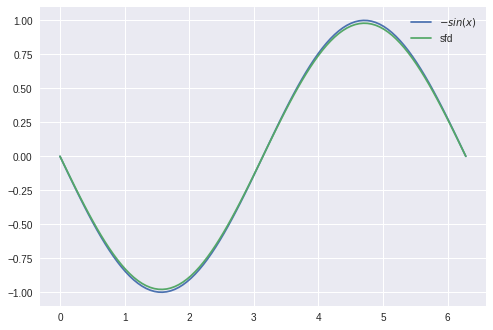

In [3]:
h = .5 #step size

x_co = np.linspace(0, 2*np.pi, 100)
plt.plot(x_co, - np.sin(x_co), label = '$-sin(x)$');
plt.plot(x_co, sfd(np.sin, x_co, h), label = 'sfd');
plt.legend();

plot log-log chart for the demonstration of convergence rate, find convergence order using linear regression.

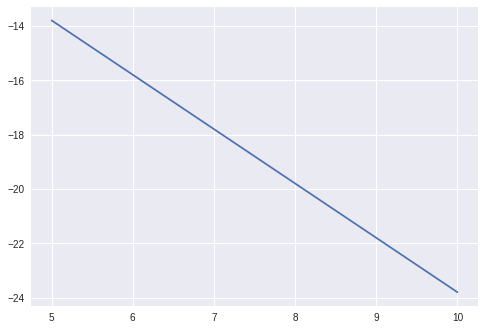

In [4]:
#Based on the previous notebook regarding finite difference convergence
#Given no point to start from, opt to use the same value the previous notebook used.

x_target = np.pi/3 #target point to be examined
y_target = -np.sin(x_target) #exact derivative value at the target point

#No values of n are given either; use the same as the previous notebook.
nn = np.arange(5, 11)
hh = 1/np.power(2, nn) #step sizes to be taken

err = sfd(np.sin, x_target, hh) - y_target #errors corresponding to each step size
yy = np.log2(np.abs(err))
plt.plot(nn, yy)

In [5]:
#Now, regress.
import scipy.stats as ss
out = ss.linregress(nn,yy)
print('----->>>the convergence order is ' + str(-out[0]))

----->>>the convergence order is 2.0002350881818582
